In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
plt.rcParams['figure.figsize'] = [8, 4.5]

In [97]:
data_root = Path("benchmarks/results/whisper_benchmark")

In [98]:
datasets = {p.stem.removeprefix("NVIDIA"): pd.read_csv(p) for p in data_root.glob("*.csv")}

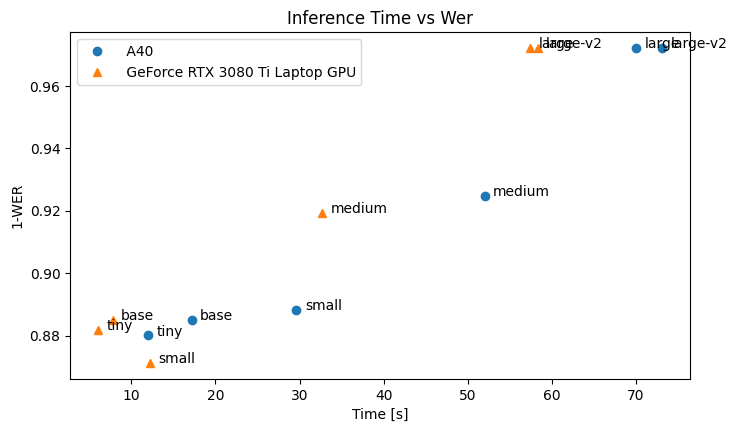

In [101]:
markers = iter(["o", "^"])
for gpu, data in datasets.items():
    x = data["time"]
    y = 1-data["wer"]
    plt.plot(x ,y , next(markers), label=gpu)
    plt.title("Inference Time vs Wer")
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("1-WER")
    #plt.ylim(bottom=0)

    for index, size in data["model_size"].items():
        plt.annotate(size, (x[index] + 1, y[index]))

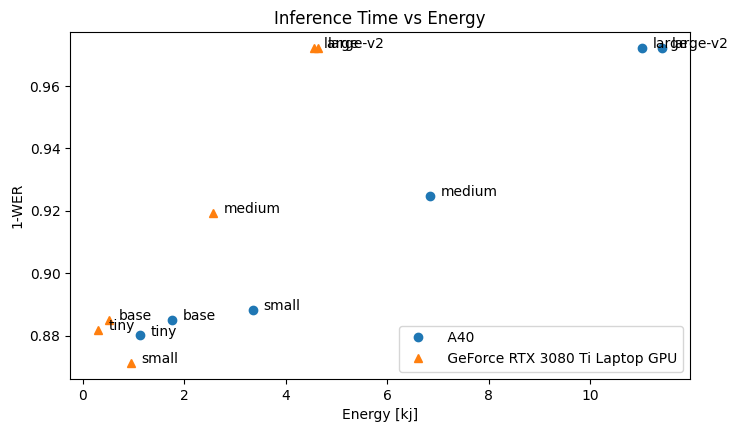

In [102]:
markers = iter(["o", "^"])
for gpu, data in datasets.items():
    x = data["energy"] / 1_000
    y = 1-data["wer"]
    plt.plot(x ,y , next(markers), label=gpu)
    plt.title("Inference Time vs Energy")
    plt.legend()
    plt.xlabel("Energy [kj]")
    plt.ylabel("1-WER")
    # plt.ylim(bottom=0)

    for index, size in data["model_size"].items():
        plt.annotate(size, (x[index] + 0.2, y[index]))

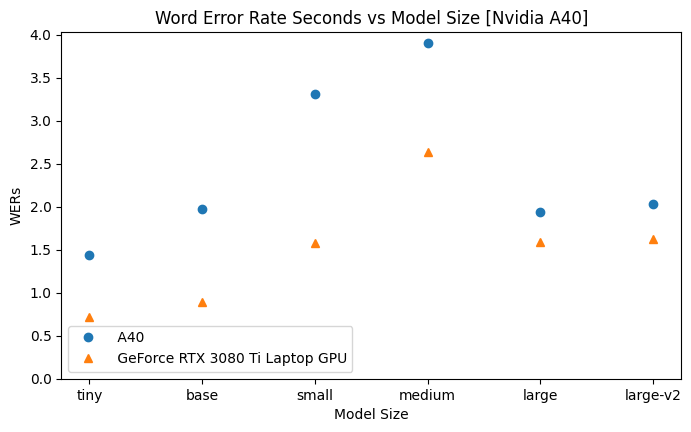

In [103]:
markers = iter(["o", "^"])
for gpu, data in datasets.items():
    x = data["model_size"]
    y = data["wer"] * data["time"]
    plt.plot(x ,y , next(markers), label=gpu)

    plt.xlabel("Model Size")
    plt.ylabel("WERs")
    plt.ylim(bottom=0)

plt.title("Word Error Rate Seconds vs Model Size [Nvidia A40]")
plt.legend();
# plt.ylabel("WERs")
# 
# # plt.ylim((0,1.1))
# plt.legend(["A40", "RTX 3080 Ti (M)"])

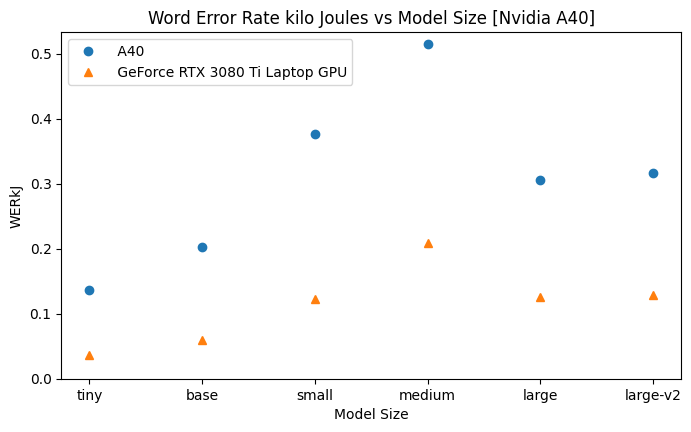

In [104]:
markers = iter(["o", "^"])
for gpu, data in datasets.items():
    x = data["model_size"]
    y = data["wer"] * data["energy"] / 1_000
    plt.plot(x ,y , next(markers), label=gpu)

    plt.xlabel("Model Size")
    plt.ylabel("WERkJ")
    plt.ylim(bottom=0)

plt.title("Word Error Rate kilo Joules vs Model Size [Nvidia A40]")
plt.legend();
# plt.ylabel("WERs")
# 
# # plt.ylim((0,1.1))
# plt.legend(["A40", "RTX 3080 Ti (M)"])

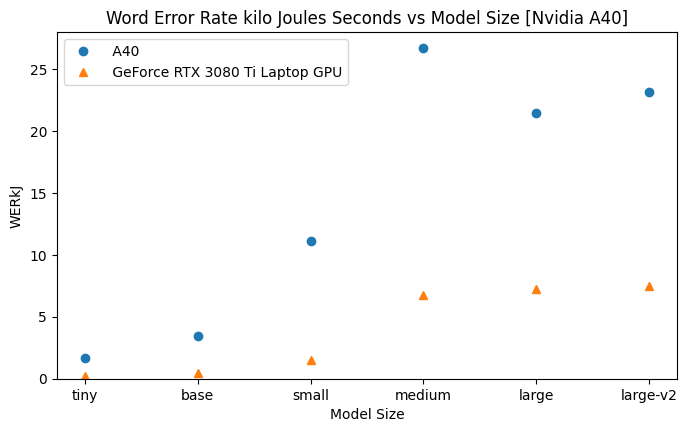

In [94]:
markers = iter(["o", "^"])
for gpu, data in datasets.items():
    x = data["model_size"]
    y = data["wer"] * data["energy"] / 1_000 * data["time"]
    plt.plot(x ,y , next(markers), label=gpu)

    plt.xlabel("Model Size")
    plt.ylabel("WERkJ")
    plt.ylim(bottom=0)

plt.title("Word Error Rate kilo Joules Seconds vs Model Size [Nvidia A40]")
plt.legend()
# plt.ylabel("WERs")
# 
# # plt.ylim((0,1.1))
# plt.legend(["A40", "RTX 3080 Ti (M)"])